# Case 1 by Banal Team
<hr>

## Table of Contents

* [1 Introcution](#chapter1)
    * [1.1 Data Understanding](#section_1_1)
    * [1.2 Data Import ](#section_1_2)
* [2 Data Preparation](#chapter2)
    * [2.1 Data Cleaning](#section_2_1)
    * [2.2 Data Statistics](#section_2_2)
* [3 Assignment](#chapter3)
    * [3.1 ](#section_3_1)
    * [3.2 ](#section_3_2)
    * [3.3 ](#section_3_3)
    * [3.4 ](#section_3_4)
    
---

## 0 About the Dataset

The dataset is parsed data from the website which contains all of the ads of apartments in Almaty. It containt over 20k ads across 10 variables such as price, rooms, area, street, city, ZHK, type, year, actual_floor, total_floors.


## 1 Introduction <a class="anchor" id="chapter1"></a>

### 1.1 Data Understanding <a class="anchor" id="section_1_1"></a>


**Exhibit 1: Variable Description** <a class="anchor" id="exhibit1"></a>
* **price** - price of the property in KZT
* **rooms** - number of rooms (integer number)
* **area** - total area of the property (apartment) in square meters
* **street** - street name of the address
* **city** - name of the city
* **ZHK** - name of the complex 
* **type** - type of the building
* **year** - year of commissioning
* **actual_floor** - floor of the apartment
* **total_floors** - number of storeys in the building

We can classify the various data columns into numerical/categorical attributes:
1. Numerical Attributes: price, rooms, area, year, actual_floor, total_floors
2. Categorical Attributes: street, city, ZHK, type

<hr>

### 1.2 Data Import  <a class="anchor" id="section_1_2"></a>


In [1]:
import pandas as pd

data = pd.read_csv('./css429_case1_#1.csv')
data.head()

,price,rooms,area,street,city,ZHK,type,year,actual_floor,total_floors
0,10 500 000,1,36,Яссауи,Алматы,NaN,NaN,NaN,9.0,9.0
1,40 000 000,3,70,Янушкевича,Алматы,Кок Жер,монолитный,2019.0,10.0,NaN
2,24 500 000,2,49,Янушкевича,Алматы,Кок Жер,монолитный,2019.0,2.0,10.0
3,22 500 000,2,48,Янушкевича,Алматы,Кок Жер,монолитный,2019.0,5.0,10.0
4,35 500 000,3,84,Янушкевича,Алматы,Кок Жер,монолитный,2019.0,8.0,10.0


In [2]:
print("There are", data.shape[0], "rows, and", data.shape[1], "columns in the dataset.")

There are 20001 rows, and 10 columns in the dataset.


<hr>

## 2 Data Preparation <a class="anchor" id="chapter2"></a>

### 2.1 Data Cleaning <a class="anchor" id="section_2_1"></a>

In [3]:
# Strip off empty spaces and convert to numeric
data.price = data.price.astype(str).str.replace(' ', '')

# Convert columns "price" and "year" into numeric values
data['price'] = data['price'].apply(pd.to_numeric)
data['year'] = data['year'].apply(pd.to_numeric)
data.dtypes

price             int64
rooms             int64
area              int64
street           object
city             object
ZHK              object
type             object
year            float64
actual_floor    float64
total_floors    float64
dtype: object

In [4]:
# Checking the missing values
data.isnull().sum()

price               0
rooms               0
area                0
street           8669
city                0
ZHK             15496
type            15455
year            15297
actual_floor     4205
total_floors     4310
dtype: int64

Our data is okay, since the is no null values in price, rooms and area. They are our main columns. We won't drop null rows from other columns because there is a lot of them.

### 2.2 Data Statistics <a class="anchor" id="section_2_2"></a>

In [5]:
# Descriptive stats with applying some formatting for easy reading
with pd.option_context('float_format', '{:,.2f}'.format): 
    print(data.describe())

                 price     rooms      area     year  actual_floor  \
count        20,001.00 20,001.00 20,001.00 4,704.00     15,796.00   
mean     35,552,196.49      2.41     71.64 2,013.29          4.73   
std      44,323,361.69      1.00     45.90     6.44          3.56   
min       2,500,000.00      1.00      9.00 1,955.00          1.00   
25%      18,500,000.00      2.00     45.00 2,010.00          2.00   
50%      24,999,999.00      2.00     60.00 2,015.00          4.00   
75%      37,000,000.00      3.00     80.00 2,018.00          6.00   
max   1,290,000,000.00     15.00  1,480.00 2,019.00         33.00   

       total_floors  
count     15,691.00  
mean           7.98  
std            4.75  
min            1.00  
25%            5.00  
50%            5.00  
75%           10.00  
max           35.00  


## 3 Assignment <a class="anchor" id="chapter3"></a>


### 1<a class="anchor" id="section_3_1"></a>


Before running any model, pick any two variables and attempt to show an (interesting)
relation via visualization. This requires one to formulate a question, and to communicate
clearly a conclusion based on data visualization. Ideally this would suggest ways to act on the
issue

Text(0, 0.5, 'price')

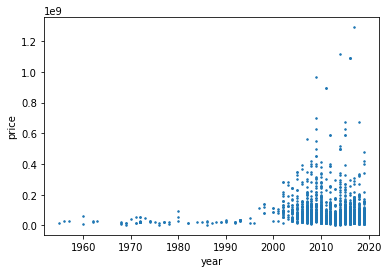

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot( 'year', 'price', data=data, linestyle='', marker='.', markersize=3)
plt.xlabel('year')
plt.ylabel('price')




By the graph above, we can see that the year of the building affects the price of the apartment. In this visual demonstration, the price of the apartments really has increased since the 2000s and it’s not planning to decrease, but still you can find an apartment built in 2020 with the same price as an apartment built in 1950.

<hr>

## 2<a class="anchor" id="section_3_2"></a>

Try to explain price with area. What can you conclude?

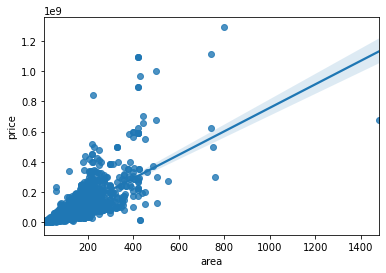

In [7]:
sns.regplot(x='area', y='price', data=data)

We can conclude that most of the time price increases as the area becomes larger, but you can see here that the most expensive apartment is not the one with the largest area.You can actually find an apartment with an area about 200m^2 for less than 100m tenge and still can have the opportunity to buy an apartment with the same area but for about 900m tenge. Since there are a lot of  parameters that affect the price, our choice in the graph can vary very much.
<hr>

## 3 <a class="anchor" id="section_3_3"></a>


In your opinion, can any of the variables provided in Exhibit 1 help to predict apartment
prices? Since opinions do not provide strong arguments, provide a simple evidence based on
data.

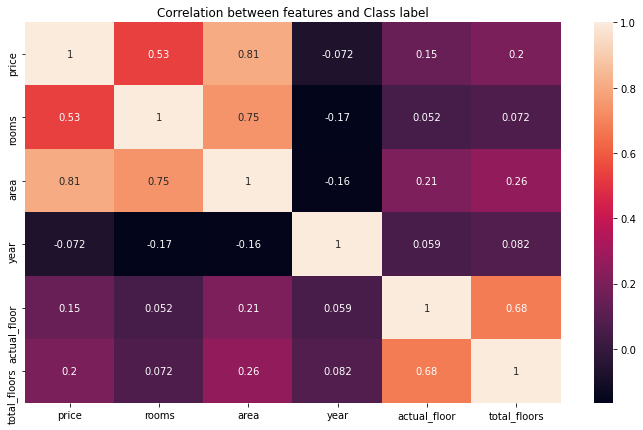

In [8]:
corr = data.drop('city',axis=1).corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True)
plt.title('Correlation between features and Class label')
plt.savefig('heatmap.png')
plt.show()

By looking to the heatmap we can say that the most useful feature to predict apartment price is the **area**. Because it gives us the highest correlation. Second feature that gives us highest correlation is the **rooms** column.

<hr>

## 4 <a class="anchor" id="section_3_4"></a>

Run a multiple regression at least 4 of the variables described in Exhibit 1. Which variables
are statistically significant?

In [9]:
#Linear Regression 
from sklearn.linear_model import LinearRegression 
data=data.fillna(0)
lm=LinearRegression()
X = data[['year']]
Y = data['price']

#fit the model, i.e. find the parameters b0 and b1
lm.fit(X, Y)

#obtain preditions
Yhat = lm.predict(X)

#you can view the intercept (b0):
print('Intercept: ', lm.intercept_)

#you can view the slope (b1):
print('Slope or coefficient of the feature (b1): ', lm.coef_[0])

Intercept:  28220786.763289787
Slope or coefficient of the feature (b1):  15483.406730212208


In [11]:
# Let's see how many categories each of these columns have
categorical_variables = data.select_dtypes(include=['object'])
for col in categorical_variables.columns[:]:
    print(col, ": ", len(categorical_variables[col].unique()), " labels")

street :  557  labels
city :  1  labels
ZHK :  272  labels
type :  5  labels


In [12]:
# Capture frequency values for each column
data.type.value_counts().to_dict()

{0: 15455,
 'монолитный': 4260,
 'кирпичный': 176,
 'жилой': 74,
 'панельный дом': 36}

In [13]:
data.city.value_counts().to_dict()

{'Алматы': 20001}

In [14]:
data.ZHK.value_counts().to_dict()

{0: 15496,
 'Шахристан': 317,
 'Манхеттан': 160,
 'Atameken': 123,
 'Алтын Булак 2': 114,
 'Аманат': 108,
 'Асыл Тау': 106,
 'LEGENDA': 92,
 'КУАТ': 88,
 'Alatau City': 74,
 'Восточный Парк': 71,
 'Mega Tower Almaty': 66,
 'AFD Plaza': 62,
 'Акварель': 61,
 'Гаухартас': 60,
 'Алмалы': 58,
 'Тау Самал': 58,
 'Премьера': 54,
 'Central Park Residence': 51,
 'Арай': 50,
 'Хан-Тенгри': 50,
 'Алтын Булак 1': 49,
 'Симфония': 47,
 'Жастар Mag': 47,
 'Европолис': 46,
 'АкКент': 45,
 'Аль-Фараби': 44,
 'Element': 42,
 'Спутник': 40,
 'Береке': 39,
 'Науаи': 36,
 'Alma City': 36,
 'Максима': 35,
 'Өркендеу': 33,
 'Orion': 32,
 'Тенгиз Тауэрс': 31,
 'Керемет': 31,
 'Толе би Тау': 30,
 'Мечта': 29,
 'Dostyk Residence': 29,
 'Exclusive Life': 28,
 'Аэлита': 28,
 'Жайлы': 28,
 'Вавилон': 27,
 'Каусар': 27,
 'Максима Резидентс': 27,
 'Парк Горького': 27,
 'Айгерим': 26,
 'Нурлы Тау': 25,
 'Бухар Жырау Тауэрс': 25,
 'Солнечный Квартал': 24,
 'Солнечная Долина': 24,
 'Талисман': 24,
 'Бай–тал': 24,
 'E

In [15]:
data.street.value_counts().to_dict()

{0: 8669,
 'Навои': 516,
 'Розыбакиева': 470,
 'Брусиловского': 363,
 'Сатпаева': 358,
 'Гагарина': 356,
 'Толеби': 283,
 'Аль-Фараби': 266,
 'Абая': 252,
 'Казыбекби': 184,
 'Богенбай': 182,
 'Радостовца': 174,
 'Жарокова': 173,
 'Достык': 166,
 'Тимирязева': 163,
 'Айманова': 160,
 'Наурызбай': 153,
 'Гоголя': 132,
 'Райымбека': 131,
 'Манаса': 130,
 'Шевченко': 128,
 'Саина': 127,
 'ЖасКанат': 127,
 'Кекилбайулы': 127,
 'Макатаева': 126,
 'Муратбаева': 124,
 'Сейфуллина': 124,
 'Курмангазы': 120,
 'Егизбаева': 119,
 'Кабанбай': 116,
 'Ауэзова': 111,
 'Жандосова': 103,
 'Байзакова': 102,
 'Кунаева': 94,
 'Карасай': 93,
 'Аккент': 91,
 'Тулебаева': 89,
 'Клочкова': 86,
 'Торайгырова': 86,
 'Аскарова': 86,
 'Байтурсынова': 85,
 'Ходжанова': 83,
 'Панфилова': 82,
 'Назарбаева': 79,
 'Масанчи': 78,
 'Валиханова': 77,
 'Жамбыла': 75,
 'Шагабутдинова': 73,
 'Каблукова': 68,
 'Бухар-Жырау': 68,
 'Желтоксан': 66,
 'Пушкина': 65,
 'Кенесары': 60,
 'Нурмакова': 58,
 'Маркова': 58,
 'Жуалы': 55

In [16]:
frequency_map_ZHK = data.ZHK.value_counts().to_dict()
frequency_map_type = data.type.value_counts().to_dict()
frequency_map_street = data.street.value_counts().to_dict()
frequency_map_city = data.city.value_counts().to_dict()

data.ZHK = data.ZHK.map(frequency_map_ZHK)
data.type = data.type.map(frequency_map_type)
data.street = data.street.map(frequency_map_street)
data.city = data.city.map(frequency_map_city)

data.head()

,price,rooms,area,street,city,ZHK,type,year,actual_floor,total_floors
0,10500000,1,36,1,20001,15496,15455,0.0,9.0,9.0
1,40000000,3,70,16,20001,12,4260,2019.0,10.0,0.0
2,24500000,2,49,16,20001,12,4260,2019.0,2.0,10.0
3,22500000,2,48,16,20001,12,4260,2019.0,5.0,10.0
4,35500000,3,84,16,20001,12,4260,2019.0,8.0,10.0


Now we are ready to feed these variables into our MLR model.

In [17]:
#extract and store predictor variables and store them as Z

Z = data[['ZHK','type','street','city']]

#train the model
lm.fit(Z, data['price'])

#obtain preditions (array of arrays)
Yhat = lm.predict(Z)

#you can view the intercept (b0):
print('Intercept: ', lm.intercept_)

#you can view the slope array([b1, b2, b3, b4]):
print('Slopes / coefficients of the features (b1 to b7): ', lm.coef_)

Intercept:  64025777.12946288
Slopes / coefficients of the features (b1 to b7):  [-1484.50973358  -830.75171925    12.28010083     0.        ]


In [18]:
Yhat

array([28182558.75699074, 60469157.17026399, 60469157.17026399, ...,
       28289002.67094914, 28289002.67094914, 28289002.67094914])

#### The estimated linear model:

**Price = **

<hr>

There is better of way representing model fitting results with **`statsmodels`** package.
<hr>
Linear Regression using statsmodels

In [19]:
import statsmodels.api as sm

X = data[['ZHK','type','street','city']]
y = data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X)

results = model.fit()
#results.params

# Full summary report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     660.3
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:25:16   Log-Likelihood:            -3.7959e+05
No. Observations:               20001   AIC:                         7.592e+05
Df Residuals:                   19997   BIC:                         7.592e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZHK        -1484.5097    114.103    -13.010      0.0

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     660.3
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:25:18   Log-Likelihood:            -3.7959e+05
No. Observations:               20001   AIC:                         7.592e+05
Df Residuals:                   19997   BIC:                         7.592e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZHK        -1484.5097    114.103    -13.010      0.000   -1708.161   -1260.858
type        -830.7517    151.467     -5.485      0.000   -1127.640    -533.864
street        12.2801     76.993      0.159      0.873    -138.632     163.193
city        3201.1288     47.288     67.695      0.000    3108.441    3293.817
==============================================================================
Omnibus:                    32618.774   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32164005.356
Skew:                          10.742   Prob(JB):                         0.00
Kurtosis:                     198.278   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""